In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal
from scipy.interpolate import make_interp_spline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
#reading the dataset
df=pd.read_csv('HR_attrition_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.shape

(4410, 24)

The dataset consists of 4410 rows and 24 columns

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

The dataset is a mixture of categorical and numerical features

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Null values are present under features 'NumCompaniesWorked' and 'TotalWorkingYears'

In [6]:
df1=df.copy()

In [7]:
# dropping features that has no contribution in dataset analysis
df.drop(columns=['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'],inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### EDA on features

In [8]:
# finding the number of unique values associated with each column
for i in df.columns:
    print(i," :",df[i].nunique())

Age  : 43
Attrition  : 2
BusinessTravel  : 3
Department  : 3
DistanceFromHome  : 29
Education  : 5
EducationField  : 6
Gender  : 2
JobLevel  : 5
JobRole  : 9
MaritalStatus  : 3
MonthlyIncome  : 1349
NumCompaniesWorked  : 10
PercentSalaryHike  : 15
StockOptionLevel  : 4
TotalWorkingYears  : 40
TrainingTimesLastYear  : 7
YearsAtCompany  : 37
YearsSinceLastPromotion  : 16
YearsWithCurrManager  : 18


##### Overall Attrition

Text(0.5, 1.0, 'Attrition Pie Plot')

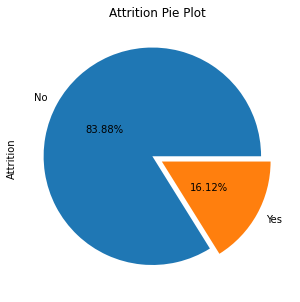

In [9]:
att=df.Attrition.value_counts()
att[:].plot.pie(figsize=(5, 5),autopct='%1.2f%%',explode=[0.05]*2,pctdistance=0.5)
plt.title('Attrition Pie Plot')

**Observation:** There is an overall attrition of 16% within the company

##### Age distribution

Text(0.5, 1.0, 'Age distribution-plot')

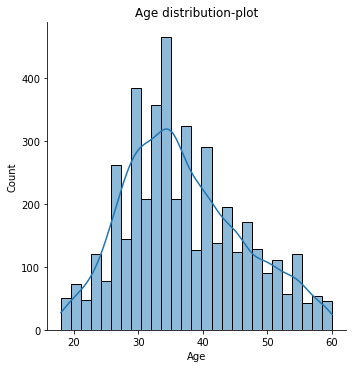

In [10]:
sns.displot(data=df, x='Age', kde=True)
plt.title('Age distribution-plot',fontsize=12)

**Observation:** Age feature shows a roughly normal distribution

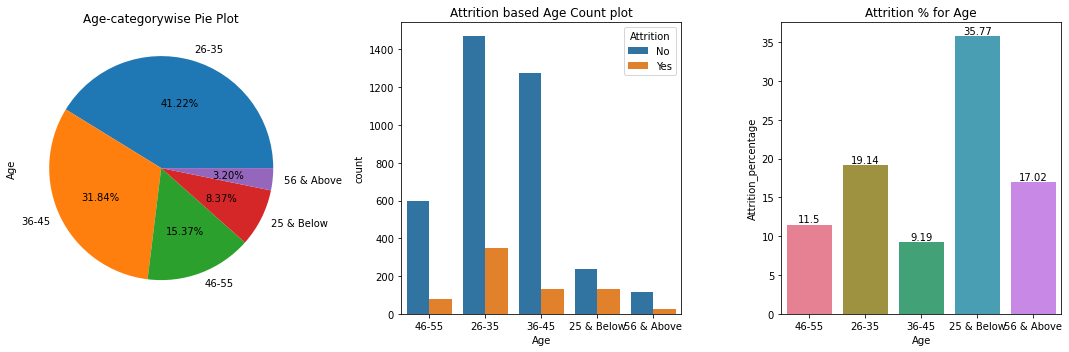

In [11]:
# converting age column into different age categories
df['Age']=pd.cut(df['Age'],bins=[17,25,35,45,55,64],labels=['25 & Below','26-35','36-45','46-55','56 & Above'])
df['Age'] = df['Age'].astype('object')
age=df.groupby(['Age', 'Attrition']).size().reset_index().rename(columns={0:'count'})
#finding the percentage attrition for each age category
age_perc=pd.DataFrame()
for i in df['Age'].unique():
    y_ind=age.loc[(age['Age']==i) & (age['Attrition']=='Yes'),['count']].index
    n_ind=age.loc[(age['Age']==i) & (age['Attrition']=='No'),['count']].index
    att_perc=round((age['count'].values[y_ind].item()/((age['count'].values[y_ind].item())+(age['count'].values[n_ind].item())))*100,2)
    age_perc=age_perc.append({'Age':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting with the above data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ages=df.Age.value_counts()
ages[:].plot.pie(autopct='%1.2f%%')
plt.title('Age-categorywise Pie Plot')
plt.subplot(1,3,2)
sns.countplot(x = 'Age',hue='Attrition', data = df)
plt.title('Attrition based Age Count plot')
plt.subplot(1,3,3)
ax=sns.barplot(x="Age",y="Attrition_percentage",data=age_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for Age')
plt.tight_layout()

**Observation:** Middle Aged people(26-35) comprises majority of the workforce. Youngsters in 25 & Below category are showing the highest attrition

##### Business Travel

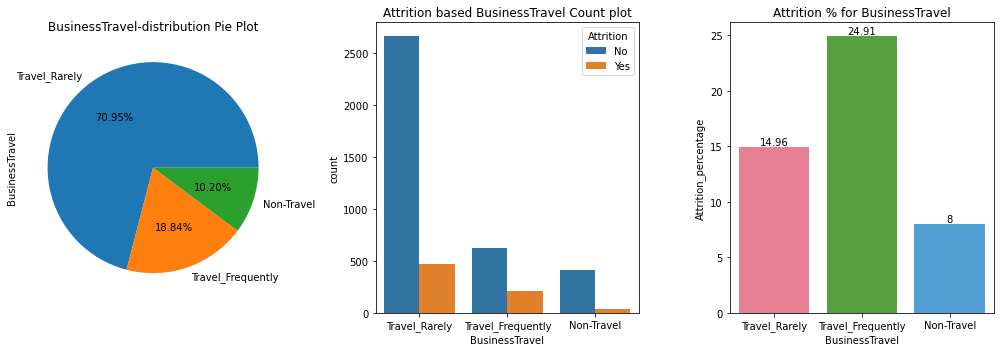

In [12]:
#finding the percentage attrition for each category under BusinessTravel
bt=df.groupby(['BusinessTravel', 'Attrition']).size().reset_index().rename(columns={0:'count'})
bt_perc=pd.DataFrame()
for i in df['BusinessTravel'].unique():
    y_ind=bt.loc[(bt['BusinessTravel']==i) & (bt['Attrition']=='Yes'),['count']].index
    n_ind=bt.loc[(bt['BusinessTravel']==i) & (bt['Attrition']=='No'),['count']].index
    att_perc=round((bt['count'].values[y_ind].item()/((bt['count'].values[y_ind].item())+(bt['count'].values[n_ind].item())))*100,2)
    bt_perc=bt_perc.append({'BusinessTravel':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting of graphs
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
bts=df.BusinessTravel.value_counts()
bts[:].plot.pie(autopct='%1.2f%%')
plt.title('BusinessTravel-distribution Pie Plot')
plt.subplot(1,3,2)
sns.countplot(x = 'BusinessTravel',hue='Attrition', data = df)
plt.title('Attrition based BusinessTravel Count plot')
plt.subplot(1,3,3)
ax=sns.barplot(x="BusinessTravel",y="Attrition_percentage",data=bt_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for BusinessTravel')
plt.tight_layout()

**Observation:** Majority of employees travel rarely for business. The attrition is highest among those who travel most frequently for business

##### Department

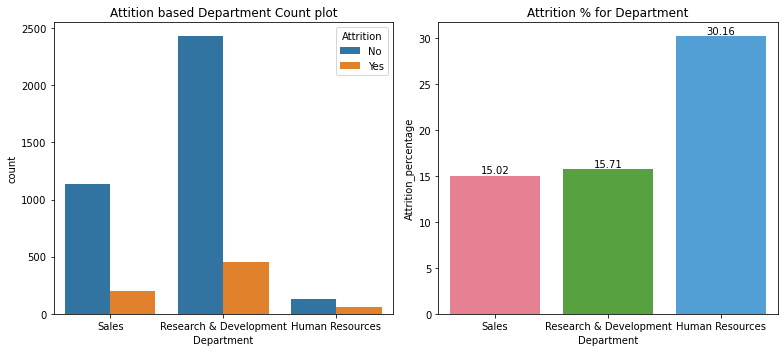

In [13]:
#Finding % attrition for each category under Department
dept=df.groupby(['Department', 'Attrition']).size().reset_index().rename(columns={0:'count'})
dept_perc=pd.DataFrame()
for i in df['Department'].unique():
    y_ind=dept.loc[(dept['Department']==i) & (dept['Attrition']=='Yes'),['count']].index
    n_ind=dept.loc[(dept['Department']==i) & (dept['Attrition']=='No'),['count']].index
    att_perc=round((dept['count'].values[y_ind].item()/((dept['count'].values[y_ind].item())+(dept['count'].values[n_ind].item())))*100,2)
    dept_perc=dept_perc.append({'Department':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.countplot(x = 'Department',hue='Attrition', data = df)
plt.title('Attition based Department Count plot')
plt.subplot(1,2,2)
ax=sns.barplot(x="Department",y="Attrition_percentage",data=dept_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for Department')
plt.tight_layout()

**Observation:** Although count under Human Resources is the least it is showing highest attrition

##### Education

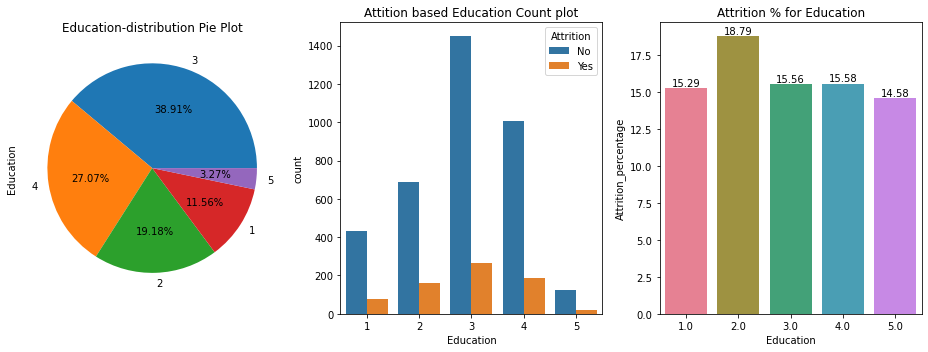

In [14]:
# Finding % attrition for categories under education
edn=df.groupby(['Education', 'Attrition']).size().reset_index().rename(columns={0:'count'})
edn_perc=pd.DataFrame()
for i in df['Education'].unique():
    y_ind=edn.loc[(edn['Education']==i) & (edn['Attrition']=='Yes'),['count']].index
    n_ind=edn.loc[(edn['Education']==i) & (edn['Attrition']=='No'),['count']].index
    att_perc=round((edn['count'].values[y_ind].item()/((edn['count'].values[y_ind].item())+(edn['count'].values[n_ind].item())))*100,2)
    edn_perc=edn_perc.append({'Education':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
edns=df.Education.value_counts()
edns[:].plot.pie(autopct='%1.2f%%')
plt.title('Education-distribution Pie Plot')
plt.subplot(1,3,2)
sns.countplot(x = 'Education',hue='Attrition', data = df)
plt.title('Attition based Education Count plot')
plt.subplot(1,3,3)
ax=sns.barplot(x="Education",y="Attrition_percentage",data=edn_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for Education')
plt.tight_layout()

**Observation:** Majority of the workforce is having a moderate level of education. The attrition is almost the same across all levels.

##### Field of Education

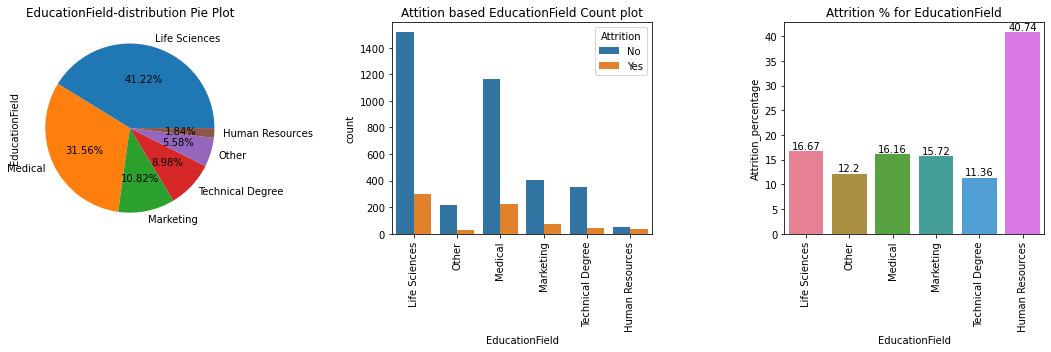

In [15]:
# Finding % attrition for categories under field of education
ednf=df.groupby(['EducationField', 'Attrition']).size().reset_index().rename(columns={0:'count'})
ednf_perc=pd.DataFrame()
for i in df['EducationField'].unique():
    y_ind=ednf.loc[(ednf['EducationField']==i) & (ednf['Attrition']=='Yes'),['count']].index
    n_ind=ednf.loc[(ednf['EducationField']==i) & (ednf['Attrition']=='No'),['count']].index
    att_perc=round((ednf['count'].values[y_ind].item()/((ednf['count'].values[y_ind].item())+(ednf['count'].values[n_ind].item())))*100,2)
    ednf_perc=ednf_perc.append({'EducationField':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ednfs=df.EducationField.value_counts()
ednfs[:].plot.pie(autopct='%1.2f%%')
plt.title('EducationField-distribution Pie Plot')
plt.subplot(1,3,2)
ax=sns.countplot(x = 'EducationField',hue='Attrition', data = df)
ax.tick_params(axis='x', rotation=90)
plt.title('Attition based EducationField Count plot')
plt.subplot(1,3,3)
ax=sns.barplot(x="EducationField",y="Attrition_percentage",data=ednf_perc,palette='husl')
ax.tick_params(axis='x', rotation=90)
plt.bar_label(ax.containers[0])
plt.title('Attrition % for EducationField')
plt.tight_layout()

**Observation:** Almost 70% of the work force is under Medical or Life Sciences field. Human Resorces which constitutes the least in count is having the highest attrition in terms of percentage.

##### Gender

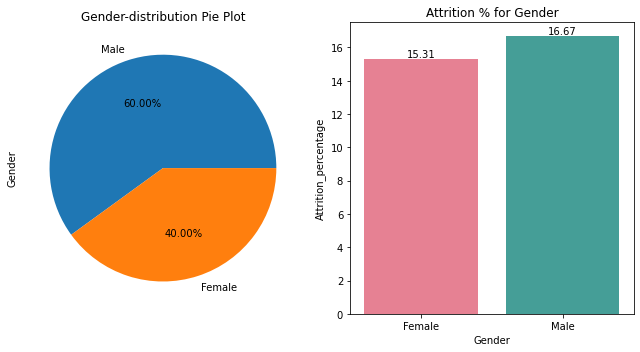

In [16]:
#finding attrition percentage among gender
gen=df.groupby(['Gender', 'Attrition']).size().reset_index().rename(columns={0:'count'})
gen_perc=pd.DataFrame()
for i in df['Gender'].unique():
    y_ind=gen.loc[(gen['Gender']==i) & (gen['Attrition']=='Yes'),['count']].index
    n_ind=gen.loc[(gen['Gender']==i) & (gen['Attrition']=='No'),['count']].index
    att_perc=round((gen['count'].values[y_ind].item()/((gen['count'].values[y_ind].item())+(gen['count'].values[n_ind].item())))*100,2)
    gen_perc=gen_perc.append({'Gender':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
gens=df.Gender.value_counts()
gens[:].plot.pie(autopct='%1.2f%%')
plt.title('Gender-distribution Pie Plot')
plt.subplot(1,2,2)
ax=sns.barplot(x="Gender",y="Attrition_percentage",data=gen_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for Gender')
plt.tight_layout()

**Observation:** Males constitue 60% of the workforce. Percentage attrition is almost the same for males and females.

##### Job Level

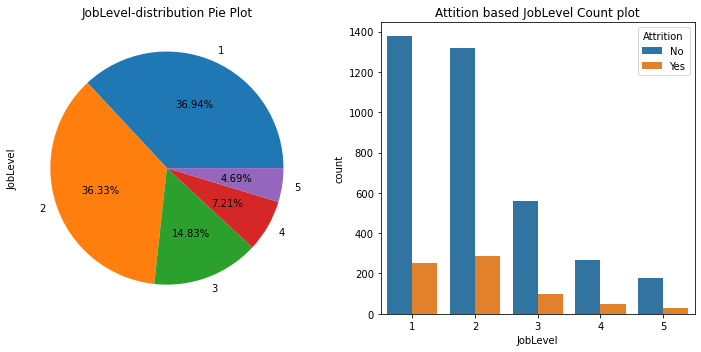

In [17]:
#Plotting
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
jbls=df.JobLevel.value_counts()
jbls[:].plot.pie(autopct='%1.2f%%')
plt.title('JobLevel-distribution Pie Plot')
plt.subplot(1,2,2)
sns.countplot(x = 'JobLevel',hue='Attrition', data = df)
plt.title('Attition based JobLevel Count plot')
plt.tight_layout()

**Observation:** Three-fourth of the work force has employees from lower levels 1 & 2. Attrition is roughly the same across all the joblevels

##### Job Role

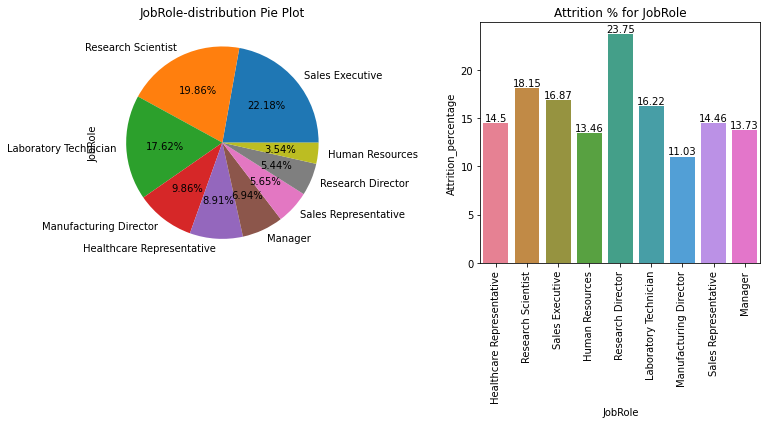

In [18]:
#finding attrition % under Job role
jbr=df.groupby(['JobRole', 'Attrition']).size().reset_index().rename(columns={0:'count'})
jbr_perc=pd.DataFrame()
for i in df['JobRole'].unique():
    y_ind=jbr.loc[(jbr['JobRole']==i) & (jbr['Attrition']=='Yes'),['count']].index
    n_ind=jbr.loc[(jbr['JobRole']==i) & (jbr['Attrition']=='No'),['count']].index
    att_perc=round((jbr['count'].values[y_ind].item()/((jbr['count'].values[y_ind].item())+(jbr['count'].values[n_ind].item())))*100,2)
    jbr_perc=jbr_perc.append({'JobRole':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
jbrs=df.JobRole.value_counts()
jbrs[:].plot.pie(autopct='%1.2f%%')
plt.title('JobRole-distribution Pie Plot')
plt.subplot(1,2,2)
ax=sns.barplot(x="JobRole",y="Attrition_percentage",data=jbr_perc,palette='husl')
plt.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=90)
plt.title('Attrition % for JobRole')
plt.tight_layout()

**Observation:** Research Director role is showing highest attrition and Manufacturing Director role is showing the least attrition in terms of percentage

##### Marital Status

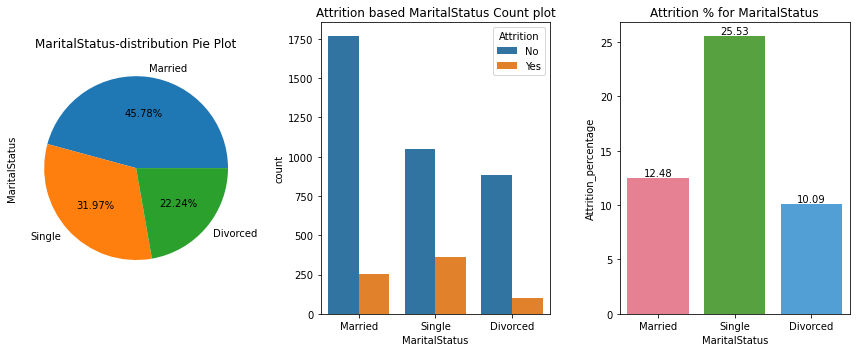

In [19]:
#Finding the % attrition under marital status
ms=df.groupby(['MaritalStatus', 'Attrition']).size().reset_index().rename(columns={0:'count'})
ms_perc=pd.DataFrame()
for i in df['MaritalStatus'].unique():
    y_ind=ms.loc[(ms['MaritalStatus']==i) & (ms['Attrition']=='Yes'),['count']].index
    n_ind=ms.loc[(ms['MaritalStatus']==i) & (ms['Attrition']=='No'),['count']].index
    att_perc=round((ms['count'].values[y_ind].item()/((ms['count'].values[y_ind].item())+(ms['count'].values[n_ind].item())))*100,2)
    ms_perc=ms_perc.append({'MaritalStatus':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
mss=df.MaritalStatus.value_counts()
mss[:].plot.pie(autopct='%1.2f%%')
plt.title('MaritalStatus-distribution Pie Plot')
plt.subplot(1,3,2)
sns.countplot(x = 'MaritalStatus',hue='Attrition', data = df)
plt.title('Attrition based MaritalStatus Count plot')
plt.subplot(1,3,3)
ax=sns.barplot(x="MaritalStatus",y="Attrition_percentage",data=ms_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for MaritalStatus')
plt.tight_layout()

**Observation:** Employees who are Single are showing higher levels of attrition compared to Married and Divorced

##### Years with current Manager

Text(0.5, 1.0, 'Attrition % for YearsWithCurrManager')

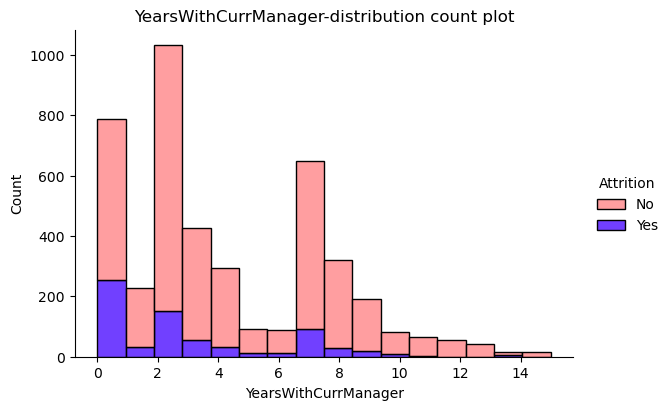

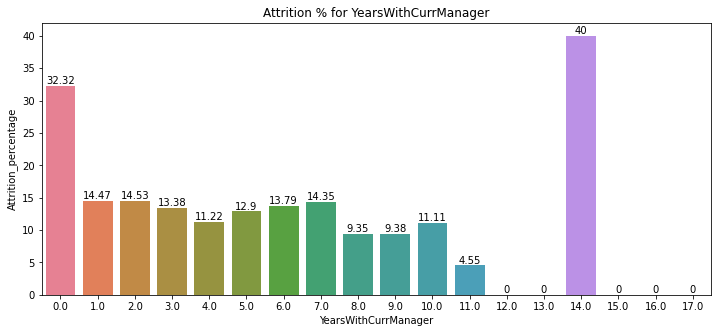

In [20]:
#Plot 1
ax=sns.displot(df, bins=16,height=4, aspect=1.5,x='YearsWithCurrManager', hue='Attrition',palette='gnuplot2_r',multiple='stack',binrange=(0,15))
ax.fig.set_dpi(100)
plt.title('YearsWithCurrManager-distribution count plot')
#Finding the % attrition under YearsWithCurrManager
ywcm=df.groupby(['YearsWithCurrManager', 'Attrition']).size().reset_index().rename(columns={0:'count'})
ywcm_perc=pd.DataFrame()
for i in df['YearsWithCurrManager'].unique():
    y_ind=ywcm.loc[(ywcm['YearsWithCurrManager']==i) & (ywcm['Attrition']=='Yes'),['count']].index
    n_ind=ywcm.loc[(ywcm['YearsWithCurrManager']==i) & (ywcm['Attrition']=='No'),['count']].index
    if(len(y_ind)==0):
        att_perc=0
    elif(len(n_ind)==0):
        att_perc=100
    else:
        att_perc=round((ywcm['count'].values[y_ind].item()/((ywcm['count'].values[y_ind].item())+(ywcm['count'].values[n_ind].item())))*100,2)
    ywcm_perc=ywcm_perc.append({'YearsWithCurrManager':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plot 2
plt.figure(figsize=(12,5))
ax=sns.barplot(x="YearsWithCurrManager",y="Attrition_percentage",data=ywcm_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for YearsWithCurrManager')

**Observation:** The attrition rate is higher for lesser number of years with current manager. Employees show less attrition as the association under current manager increases.However 14 years is an exception due to very low count.

##### Total Working Years

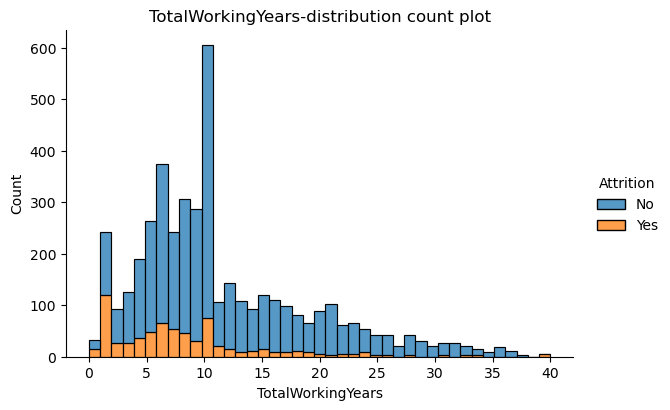

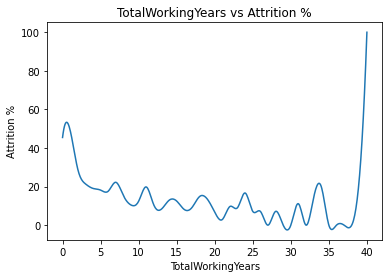

In [21]:
#Finding the % attrition under TotalWorkingYears
twy=df.groupby(['TotalWorkingYears', 'Attrition']).size().reset_index().rename(columns={0:'count'})
twy_perc=pd.DataFrame()
for i in df['TotalWorkingYears'].unique():
    y_ind=twy.loc[(twy['TotalWorkingYears']==i) & (twy['Attrition']=='Yes'),['count']].index
    n_ind=twy.loc[(twy['TotalWorkingYears']==i) & (twy['Attrition']=='No'),['count']].index
    if(len(y_ind)==0):
        att_perc=0
    elif(len(n_ind)==0):
        att_perc=100
    else:
        att_perc=round((twy['count'].values[y_ind].item()/((twy['count'].values[y_ind].item())+(twy['count'].values[n_ind].item())))*100,2)
    twy_perc=twy_perc.append({'TotalWorkingYears':i,'Attrition_percentage':att_perc},ignore_index=True)
#Plotting
ax=sns.displot(df, bins=41,height=4, aspect=1.5,x='TotalWorkingYears', hue='Attrition',multiple='stack',binrange=(0,40))
ax.fig.set_dpi(100)
plt.title('TotalWorkingYears-distribution count plot')
plt.show()
#Curve plot
twy_perc.sort_values("TotalWorkingYears",inplace=True)
twy_perc.dropna(inplace=True)
twy_perc['TotalWorkingYears'] = twy_perc['TotalWorkingYears'].astype('int')
X_Y_Spline = make_interp_spline(twy_perc['TotalWorkingYears'], twy_perc['Attrition_percentage'])
X_ = np.linspace(twy_perc['TotalWorkingYears'].min(), twy_perc['TotalWorkingYears'].max(), 500)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)
plt.title("TotalWorkingYears vs Attrition %")
plt.xlabel("TotalWorkingYears")
plt.ylabel("Attrition %")
plt.show()

**Observation:**  With the exception of 40 years which can be considered the end of an employees work cycle, we can observe that the attrition trend altogether decreases with increase in total working years and is significantly high for 1 year

##### Monthly Income

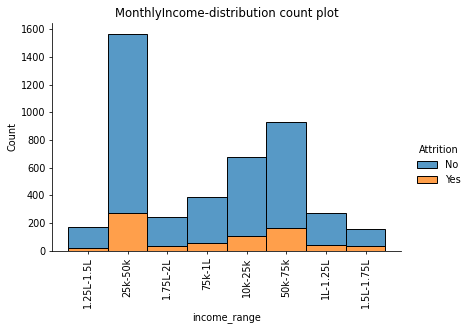

Text(0.5, 1.0, 'Attrition % for Monthly income')

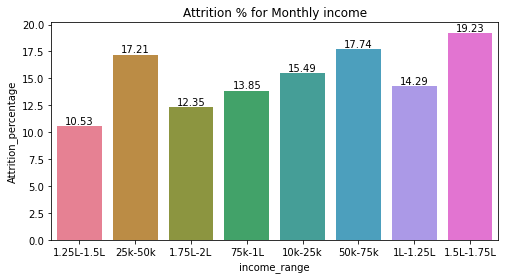

In [22]:
#Finding the % attrition under MonthlyIncome
inc=df[['MonthlyIncome','Attrition']]
#function to categorise income into groups
def categorise_income(row):  
    if row['MonthlyIncome'] > 10000 and row['MonthlyIncome'] <= 25000:
        return '10k-25k'
    elif row['MonthlyIncome'] > 25001 and row['MonthlyIncome'] <= 50000:
        return '25k-50k'
    elif row['MonthlyIncome'] > 50001 and row['MonthlyIncome'] <= 75000:
        return '50k-75k'
    elif row['MonthlyIncome'] > 75001 and row['MonthlyIncome'] <= 100000:
        return '75k-1L'
    elif row['MonthlyIncome'] > 100001 and row['MonthlyIncome'] <= 125000:
        return '1L-1.25L'
    elif row['MonthlyIncome'] > 125001 and row['MonthlyIncome'] <= 150000:
        return '1.25L-1.5L'
    elif row['MonthlyIncome'] > 150001 and row['MonthlyIncome'] <= 175000:
        return '1.5L-1.75L'
    elif row['MonthlyIncome'] > 10000 and row['MonthlyIncome'] <= 200000:
        return '1.75L-2L'
inc['income_range'] = inc.apply(lambda row: categorise_income(row), axis=1)
monin=inc.groupby(['income_range', 'Attrition']).size().reset_index().rename(columns={0:'count'})
monin_perc=pd.DataFrame()
for i in inc['income_range'].unique():
    y_ind=monin.loc[(monin['income_range']==i) & (monin['Attrition']=='Yes'),['count']].index
    n_ind=monin.loc[(monin['income_range']==i) & (monin['Attrition']=='No'),['count']].index
    if(len(y_ind)==0):
        att_perc=0
    elif(len(n_ind)==0):
        att_perc=100
    else:
        att_perc=round((monin['count'].values[y_ind].item()/((monin['count'].values[y_ind].item())+(monin['count'].values[n_ind].item())))*100,2)
    monin_perc=monin_perc.append({'income_range':i,'Attrition_percentage':att_perc},ignore_index=True)

#Plotting
ax=sns.displot(inc, height=4, aspect=1.5,x='income_range', hue='Attrition',multiple='stack')
ax.fig.set_dpi(70)
plt.title('MonthlyIncome-distribution count plot')
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()
#Plot2
plt.figure(figsize=(8,4))
ax=sns.barplot(x="income_range",y="Attrition_percentage",data=monin_perc,palette='husl')
plt.bar_label(ax.containers[0])
plt.title('Attrition % for Monthly income')

**Observation:** The attrition relatively decreases for higher income ranges with the exception of 1.5L-1.75L category which shows high attrition which is due to the very low count